In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

there is 12 months of data, we have to merge them into a single file 

In [20]:
import os
import glob
files = os.path.join("sales/","sales*.csv")
files = glob.glob(files)
df = pd.concat(map(pd.read_csv,files),ignore_index = True)
# print(df.head())
# print(df.shape)
df.to_csv("all_data.csv",index = False) #created a csv with all sales data 


  Order ID                     Product Quantity Ordered Price Each  \
0   278797            Wired Headphones                1      11.99   
1   278798        USB-C Charging Cable                2      11.95   
2   278799    Apple Airpods Headphones                1      150.0   
3   278800            27in FHD Monitor                1     149.99   
4   278801  Bose SoundSport Headphones                1      99.99   

       Order Date                      Purchase Address  
0  11/21/19 09:54   46 Park St, New York City, NY 10001  
1  11/17/19 10:03      962 Hickory St, Austin, TX 73301  
2  11/19/19 14:56  464 Cherry St, Los Angeles, CA 90001  
3  11/25/19 22:24        649 10th St, Seattle, WA 98101  
4  11/09/19 13:56         522 Hill St, Boston, MA 02215  
(186850, 6)


In [23]:
df = pd.read_csv("all_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


best month for sales and how much money was made in that month?

In [39]:
#adding a column for month
df["Month"] = df["Order Date"].str[0:2]
#df["Month"] = df["Month"].astype('int32') #converting to int   
#before we convert we have to get rid of NaN
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11


In [43]:
#getting rid of NaN
df.dropna(how = 'any',inplace = True)
df["Month"] = df["Month"].astype('float') #converting to int  

ValueError: could not convert string to float: 'Or'

In [ ]:
#in the month column there is 'Or' somewhere 

In [53]:
temp_df = df[df['Order Date'].str[0:2] == 'Or']
temp_df.head()
#getting rid of or by setting the original df to column not having Or
df = df[df['Order Date'].str[0:2] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11


In [57]:
#trying to convert again
df["Month"] = df["Month"].astype('float') #converting to int  
df["Month"] = df["Month"].astype('int') #converting to int  
print(type(df['Month'][0]))
#successfully converted month values to int 

<class 'numpy.int64'>


# adding per order sales column 

In [65]:
print(type(df['Quantity Ordered'][0]),type(df['Price Each'][0]))
#df['Sales'] = df['Quantity Ordered']*df['Price Each']
#both columns are of type string so we cannot directly multiply 
df['Price Each'] = df['Price Each'].astype('float')
df['Quantity Ordered'] = df['Quantity Ordered'].astype('float')
print(type(df['Quantity Ordered'][0]),type(df['Price Each'][0]))
#conversion successful
#we can also use pd.to_numeric(df[colname])

<class 'numpy.float64'> <class 'numpy.float64'>
<class 'numpy.float64'> <class 'numpy.float64'>


In [67]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,278797,Wired Headphones,1.0,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99
1,278798,USB-C Charging Cable,2.0,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90
2,278799,Apple Airpods Headphones,1.0,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00
3,278800,27in FHD Monitor,1.0,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99
4,278801,Bose SoundSport Headphones,1.0,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99


# Best month for sales 

In [80]:
#using group by
result = df.groupby("Month").sum()#.astype('str') #values are being printed as str to avoid e but are actually float
print(result)
#print(type(df['Sales'][0]))
#values in exponents 


       Quantity Ordered    Price Each         Sales
Month                                              
1               10903.0  1.811768e+06  1.822257e+06
2               13449.0  2.188885e+06  2.202022e+06
3               17005.0  2.791208e+06  2.807100e+06
4               20558.0  3.367671e+06  3.390670e+06
5               18667.0  3.135125e+06  3.152607e+06
6               15253.0  2.562026e+06  2.577802e+06
7               16072.0  2.632540e+06  2.647776e+06
8               13448.0  2.230345e+06  2.244468e+06
9               13109.0  2.084992e+06  2.097560e+06
10              22703.0  3.715555e+06  3.736727e+06
11              19798.0  3.180601e+06  3.199603e+06
12              28114.0  4.588415e+06  4.613443e+06


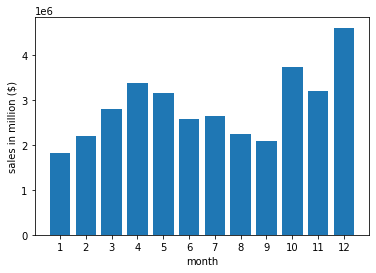

In [85]:
#plotting 
months = range(1,13)
plt.bar(months,result['Sales'])
plt.xticks(months)
plt.ylabel("sales in million ($)")
plt.xlabel("month")
plt.show()
#as a data analyst i would answer why the 12th month did better than 
#others did we spend more money on marketing, would look for 
#correlations. since the sales are in usd (for USA) it can be 
#because of the holiday season 


# which city had the highest sales 

In [138]:
df.head()
#we will need a city column 
#city is in the address column and between 2 commas 
#using.apply() - can apply any user def function on the dataframe
def getcity(address):
    #split on the commas 
    lst = address.split(",")
    return(lst[1]+" "+lst[2][1:3])
def getstate(address):
    #split on the commas 
    lst = address.split(",")
    return(lst[2][1:3])

df['city'] = df["Purchase Address"].apply(getcity)
#we might have an issue where the city name is same but state is different
df['State'] = df["Purchase Address"].apply(getstate)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,State
0,278797,Wired Headphones,1.0,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City NY,NY
1,278798,USB-C Charging Cable,2.0,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin TX,TX
2,278799,Apple Airpods Headphones,1.0,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles CA,CA
3,278800,27in FHD Monitor,1.0,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle WA,WA
4,278801,Bose SoundSport Headphones,1.0,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston MA,MA


In [129]:
results = df.groupby("city").sum()
results

,Quantity Ordered,Price Each,Month,Sales
city,,,,
"( Atlanta, GA)",16602.0,2.779908e+06,104794,2.795499e+06
"( Austin, TX)",11153.0,1.809874e+06,69829,1.819582e+06
"( Boston, MA)",22528.0,3.637410e+06,141112,3.661642e+06
"( Dallas, TX)",16730.0,2.752628e+06,104620,2.767975e+06
"( Los Angeles, CA)",33289.0,5.421435e+06,208325,5.452571e+06
"( New York City, NY)",27932.0,4.635371e+06,175741,4.664317e+06
"( Portland, ME)",2750.0,4.471893e+05,17144,4.497583e+05
"( Portland, OR)",11303.0,1.860558e+06,70621,1.870732e+06
"( San Francisco, CA)",50239.0,8.211462e+06,315520,8.262204e+06


[' Atlanta GA', ' Austin TX', ' Boston MA', ' Dallas TX', ' Los Angeles CA', ' New York City NY', ' Portland ME', ' Portland OR', ' San Francisco CA', ' Seattle WA']


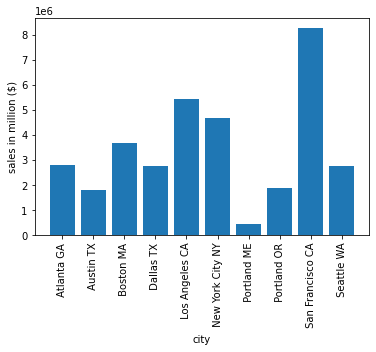

In [143]:
cities = [city for city,df in df.groupby('city')]
print(cities)
plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation = 'vertical')
plt.ylabel("sales in million ($)")
plt.xlabel("city")
plt.show()

To maximise revenue, when should we display ads (at what time of the day) ?

In [144]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,State
0,278797,Wired Headphones,1.0,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City NY,NY
1,278798,USB-C Charging Cable,2.0,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin TX,TX
2,278799,Apple Airpods Headphones,1.0,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles CA,CA
3,278800,27in FHD Monitor,1.0,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle WA,WA
4,278801,Bose SoundSport Headphones,1.0,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston MA,MA


to answer the question we will have to extract times of an order date

In [ ]:
#converting order date into a datetime object

In [145]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,State
0,278797,Wired Headphones,1.0,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.99,New York City NY,NY
1,278798,USB-C Charging Cable,2.0,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.90,Austin TX,TX
2,278799,Apple Airpods Headphones,1.0,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles CA,CA
3,278800,27in FHD Monitor,1.0,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.99,Seattle WA,WA
4,278801,Bose SoundSport Headphones,1.0,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.99,Boston MA,MA


In [146]:
#creating an hour column 
df['Hour'] = df['Order Date'].dt.hour
df['Min '] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,State,Hour,Min
0,278797,Wired Headphones,1.0,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.99,New York City NY,NY,9,54
1,278798,USB-C Charging Cable,2.0,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.90,Austin TX,TX,10,3
2,278799,Apple Airpods Headphones,1.0,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles CA,CA,14,56
3,278800,27in FHD Monitor,1.0,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.99,Seattle WA,WA,22,24
4,278801,Bose SoundSport Headphones,1.0,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.99,Boston MA,MA,13,56


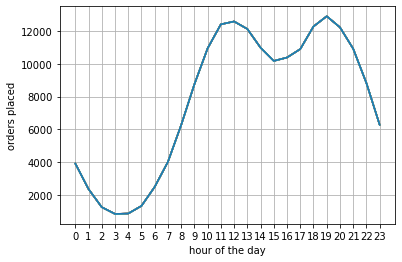

In [156]:
#to grab data and put it into a ist from a df use 
hour = [hour for hour,df in df.groupby('Hour')]
plt.xticks(hour)
plt.xlabel("hour of the day")
plt.ylabel(" Number of orders placed")
plt.plot(hour,df.groupby(['Hour']).count())
plt.grid()
plt.show()
#peak time for advertising
'''
10 am to 12 pm 
and 
6pm to 9 pm 
'''

What type of products are often sold together?

In [166]:
#if an order has the same id they were ordered together
new_df = df[df['Order ID'].duplicated(keep = False)] #will give all the rows which have the same order id 
new_df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,State,Hour,Min
9,278806,Bose SoundSport Headphones,1.0,99.99,2019-11-19 19:12:00,"174 2nd St, Boston, MA 02215",11,99.99,Boston MA,MA,19,12
10,278806,ThinkPad Laptop,1.0,999.99,2019-11-19 19:12:00,"174 2nd St, Boston, MA 02215",11,999.99,Boston MA,MA,19,12
15,278811,Wired Headphones,1.0,11.99,2019-11-06 16:01:00,"99 Elm St, San Francisco, CA 94016",11,11.99,San Francisco CA,CA,16,1
16,278811,Apple Airpods Headphones,1.0,150.00,2019-11-06 16:01:00,"99 Elm St, San Francisco, CA 94016",11,150.00,San Francisco CA,CA,16,1
24,278819,iPhone,1.0,700.00,2019-11-04 06:20:00,"880 Maple St, New York City, NY 10001",11,700.00,New York City NY,NY,6,20
25,278819,Apple Airpods Headphones,1.0,150.00,2019-11-04 06:20:00,"880 Maple St, New York City, NY 10001",11,150.00,New York City NY,NY,6,20
39,278833,iPhone,1.0,700.00,2019-11-04 10:34:00,"700 Pine St, San Francisco, CA 94016",11,700.00,San Francisco CA,CA,10,34
40,278833,Lightning Charging Cable,2.0,14.95,2019-11-04 10:34:00,"700 Pine St, San Francisco, CA 94016",11,29.90,San Francisco CA,CA,10,34
47,278840,Bose SoundSport Headphones,1.0,99.99,2019-11-23 20:46:00,"490 Walnut St, Los Angeles, CA 90001",11,99.99,Los Angeles CA,CA,20,46
48,278840,27in FHD Monitor,1.0,149.99,2019-11-23 20:46:00,"490 Walnut St, Los Angeles, CA 90001",11,149.99,Los Angeles CA,CA,20,46


In [168]:
#new combo column 
new_df['grouped'] = new_df.groupby("Order ID")['Product'].transform(lambda x:', '.join(x))
new_df.head()

<ipython-input-168-57825735f93e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['grouped'] = new_df.groupby("Order ID")['Product'].transform(lambda x:', '.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,State,Hour,Min,grouped
9,278806,Bose SoundSport Headphones,1.0,99.99,2019-11-19 19:12:00,"174 2nd St, Boston, MA 02215",11,99.99,Boston MA,MA,19,12,"Bose SoundSport Headphones, ThinkPad Laptop"
10,278806,ThinkPad Laptop,1.0,999.99,2019-11-19 19:12:00,"174 2nd St, Boston, MA 02215",11,999.99,Boston MA,MA,19,12,"Bose SoundSport Headphones, ThinkPad Laptop"
15,278811,Wired Headphones,1.0,11.99,2019-11-06 16:01:00,"99 Elm St, San Francisco, CA 94016",11,11.99,San Francisco CA,CA,16,1,"Wired Headphones, Apple Airpods Headphones"
16,278811,Apple Airpods Headphones,1.0,150.00,2019-11-06 16:01:00,"99 Elm St, San Francisco, CA 94016",11,150.00,San Francisco CA,CA,16,1,"Wired Headphones, Apple Airpods Headphones"
24,278819,iPhone,1.0,700.00,2019-11-04 06:20:00,"880 Maple St, New York City, NY 10001",11,700.00,New York City NY,NY,6,20,"iPhone, Apple Airpods Headphones"


In [172]:
#dropping duplicates
new_df = new_df[['Order ID','grouped']].drop_duplicates()
new_df.head()

,Order ID,grouped
9,278806,"Bose SoundSport Headphones, ThinkPad Laptop"
15,278811,"Wired Headphones, Apple Airpods Headphones"
24,278819,"iPhone, Apple Airpods Headphones"
39,278833,"iPhone, Lightning Charging Cable"
47,278840,"Bose SoundSport Headphones, 27in FHD Monitor"


In [186]:
from itertools import combinations 
from collections import Counter

count = Counter()

for row in new_df['grouped']: 
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key,value)


#products most often sold together are:
product : qty 

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


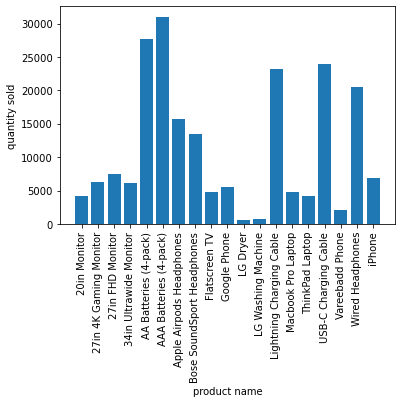

In [197]:
product_group = df.groupby("Product")
quantity = product_group.sum()["Quantity Ordered"]
product = [product for product,df in df.groupby("Product")]
plt.bar(product,quantity)
plt.xticks(product,rotation = '90')
plt.xlabel("product name")
plt.ylabel("quantity sold")
plt.show()
'''
which product sold the most and why?
From the bar chart we can see that batteries, charging cables which can
be termed as 'Essential Electronics' are being sold the most
they are also the cheapest items in the store
'''

In [198]:
prices = df.groupby("Product").mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


<ipython-input-217-55a5290c0d0e>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product,rotation = '90')


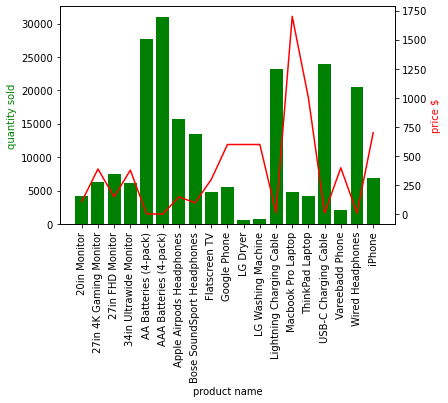

In [217]:
#adding a 2nd y axis label for price 
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(product,quantity,color = 'g')
ax2.plot(product,prices,color = 'red')

ax1.set_xlabel("product name")
ax1.set_ylabel("quantity sold",color = 'g')

ax2.set_ylabel("price $",color = 'red')

ax1.set_xticklabels(product,rotation = '90')

plt.show()